In [67]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np

In [68]:
X,y = make_classification(
    n_samples=100,
    n_features=1,
    n_informative=1,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    n_clusters_per_class=1,
    weights=[0.5,0.5],
    flip_y=0.15,
    class_sep=2.0,
    hypercube=True,
    shift=1.0,
    scale=1.0,
    shuffle=True,
    random_state=88
)

Text(0.5, 1.0, 'X (1 dimension) and y')

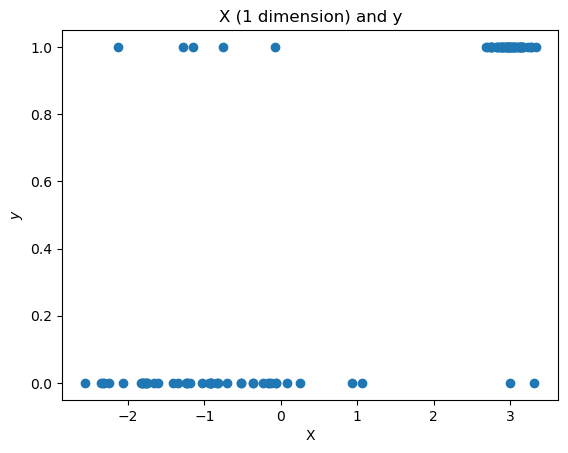

In [69]:
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("$y$")
plt.title("X (1 dimension) and y")

In [70]:
log = LogisticRegression()
log.fit(X, y)
print(log.coef_)
print(log.intercept_)

[[1.18885765]]
[-0.98497516]


Text(0.5, 1.0, 'X (1 dimension) and y')

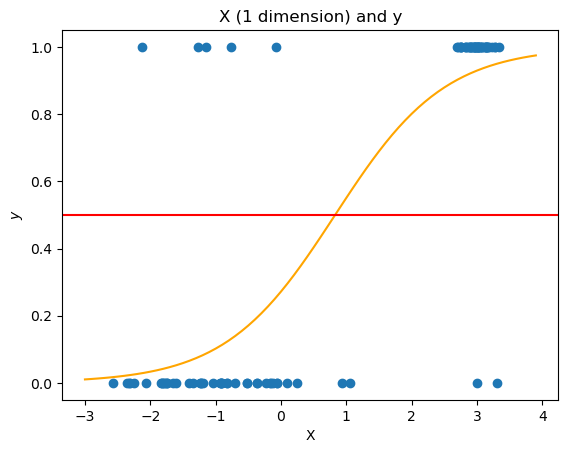

In [71]:
x_tests = np.arange(-3, 4, 0.1).reshape(-1, 1)
y_preds_x = log.predict_proba(x_tests)[:, 1]

plt.scatter(X, y)
plt.plot(x_tests, y_preds_x, c="orange")
plt.axhline(y=0.5, c="red")
plt.xlabel("X")
plt.ylabel("$y$")
plt.title("X (1 dimension) and y")

In [72]:
def predict_probability(coefs, X):
    '''
    coefs is a list that contains a and b: [coef, intercept]
    X is the features set

    Returns probability of X
    '''
    #TODO
    probabilities = 1/(1+ np.exp(-(coefs[0]*X + coefs[1])))

    return probabilities

In [73]:
y_preds = log.predict_proba(X)[:, 1]
coefs = [log.coef_, log.intercept_]
np.allclose(predict_probability(coefs, X), y_preds, atol=1e8)

True

In [74]:
def predict_class(X, coefs):
    y_preds = 1/(1+ np.exp(-(coefs[0]*X + coefs[1])))
    mask = y_preds >= 0.5
    y_preds[mask] = 1
    y_preds[~mask] = 0
    y_preds = y_preds.astype(np.int64).reshape(1, -1)
    return y_preds

In [75]:
y_preds_proba = predict_class(X, coefs) 
np.all(y_preds_proba == log.predict(X))

np.True_

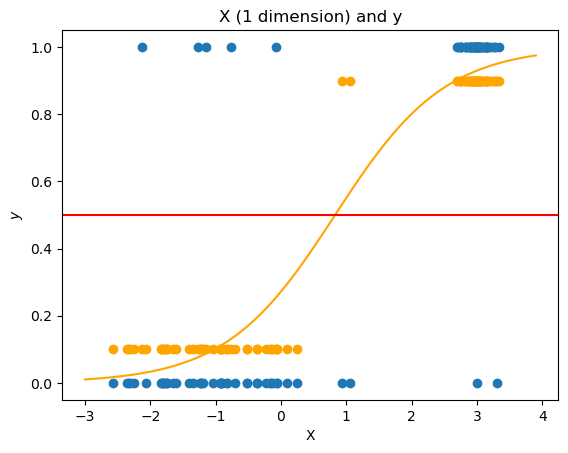

In [76]:
y_preds_proba_shift = y_preds_proba.copy().astype(np.float64)
y_preds_proba_shift[y_preds_proba_shift == 1] = 0.9
y_preds_proba_shift[y_preds_proba_shift == 0] = 0.1 

plt.scatter(X, y)
plt.plot(x_tests, y_preds_x, c="orange")
plt.scatter(X, y_preds_proba_shift, c="orange")
plt.axhline(y=0.5, c="red")
plt.xlabel("X")
plt.ylabel("$y$")
plt.title("X (1 dimension) and y")
plt.show()

In [77]:
X1, y1 = make_classification(n_features=2,
                           n_redundant=0,
                           n_samples=250,
                           n_classes=2,
                           n_clusters_per_class=1,
                           flip_y=0.05,
                           class_sep=3,
                           random_state=43)

In [78]:
clf = LogisticRegression()
clf.fit(X1, y1)

LogisticRegression()

Text(0.5, 1.0, 'Logistic regression decision boundary')

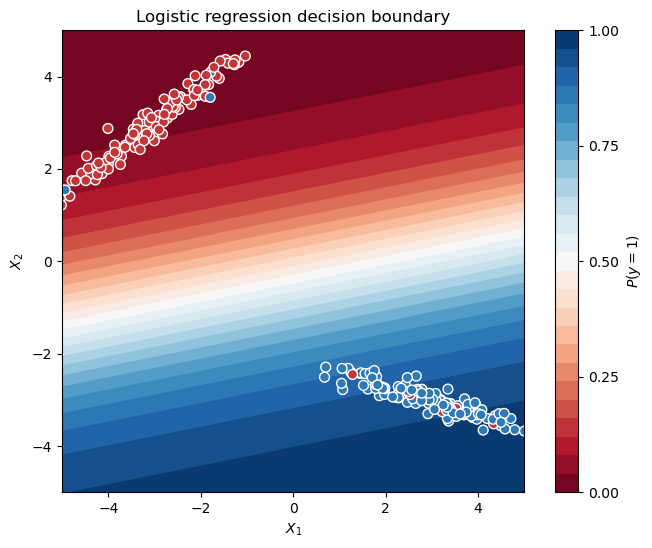

In [79]:
xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
#if needed change the line below
probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X1[:,0], X1[:, 1], c=y1, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-5, 5), ylim=(-5, 5),
       xlabel="$X_1$", ylabel="$X_2$")
ax.set_title("Logistic regression decision boundary")